In [1]:
import requests

In [2]:
import bs4

In [4]:
from bs4 import BeautifulSoup

In [5]:
import lxml

In [6]:
urla = 'https://www.oyorooms.com/oyos-in-delhi?adults=1&checkin=10/04/2018&checkout=11/04/2018&children=0&city=delhi&country=India&employee_id=null&guests=1&latitude=null&location=Delhi&longitude=null&page=1&rooms=1&searchType=city'

In [7]:
def oyo_hotels(url):
    r = requests.get(url)
    mypage = BeautifulSoup(r.text)

    myrooms = mypage.find_all('span', attrs = {'class':'newHotelCard__hotelName'})
    hotels = []
    for hotel in myrooms:
        hotels.append(hotel.text.strip())

    myplaces = mypage.find_all('span', attrs = {'class':'newHotelCard__hotelAddress'})
    locations = []
    for location in myplaces:
        locations.append(location.text.strip())

    mycost = mypage.find_all('div', attrs = {'class':'newHotelCard__pricing u-fw6'})
    prices_rough = []
    for price in mycost:
        prices_rough.append(price.text.strip()[2:6])
    prices = []
    for i in prices_rough:
        if i == '999\n':
            prices.append('999')
        else:
            prices.append(i)

    mystars_rough = mypage.find_all('div', attrs = {'class':'mdl-grid'})
    myratings = []
    for i in mystars_rough:
        myratings.append(i.find('div', attrs = {'class':'hotelRating__dataCapsule'}))
    ratings = []
    for i in myratings:
        if i is None:
            ratings.append('New')
        else:
            ratings.append(i.find('span').text.strip())

    content = []
    for i in range(0,len(hotels)):
        content.append([hotels[i], locations[i], prices[i], ratings[i]])

    return content

In [8]:
url_sec1 = 'https://www.oyorooms.com/oyos-in-delhi?adults=1&checkin=10/04/2018&checkout=11/04/2018&children=0&city=delhi&country=India&employee_id=null&guests=1&latitude=null&location=Delhi&longitude=null&page='
url_sec2 = '&rooms=1&searchType=city'

page_3 = url_sec1 + '3' + url_sec2
oyo_hotels(page_3)

/Users/p16445775/Desktop/april09/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[['OYO 13026 The Curtis',
  'plot no 56 , village toganpur , sector -9 , dwarka , Delhi',
  '972\n',
  'New'],
 ['OYO 12732 Avalon Palace',
  'Opposite Arjun Camp, Mahipalpur Bypass Road, Delhi',
  '990\n',
  'New'],
 ['OYO 12503 Hotel Corner Point',
  '1st Floor, Gali no. 6, Arakashan Rd, Delhi',
  '999',
  '4.0'],
 ['OYO 526 Hotel Mayesha Inn',
  'Near F-Block Bus Stop, Kirti Nagar, Delhi',
  '999',
  '4.0'],
 ['OYO 10045 Hotel Pearl Residency', 'Ramphal Chowk, Delhi', '999', '4.0'],
 ['OYO 9046 Hotel Metro Star',
  'Near Jamia Co-Operative Bank, Jasola, Delhi',
  '999',
  '4.0'],
 ['OYO 9030 Hotel Delhi Airport Plaza',
  'Near Vijaya Bank, Mahipalpur Extension, Delhi',
  '999',
  '4.6'],
 ['OYO 2373 Hotel D inn', 'Opp. Shiela Cinema, Delhi', '999', '4.6'],
 ['OYO 3349 Hotel Anoop', 'Plot No. 1566, Main Bazar, Delhi', '999', '3.4'],
 ['OYO 6109 Le Grand',
  'Near RK Ashram Metro Station, Gali No 7, Delhi',
  '999',
  '3.4'],
 ['OYO 11924 JP Residency',
  'F-639, Ramphal Chowk, Palam 

In [9]:
oyo_rooms_delhi = []
for i in range(1,23):
    url_delhi = url_sec1 + str(i) + url_sec2
    oyo_rooms_delhi.extend(oyo_hotels(url_delhi))
    
oyo_rooms_delhi

/Users/p16445775/Desktop/april09/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[['OYO 9150 Hotel Tourist Palace', 'Mahipalpur, Delhi', '730\n', 'New'],
 ['OYO 10032 Dwarka', 'sector 7, Delhi', '784\n', 'New'],
 ['OYO 12738 Hotel Diamond',
  'Road 3, Mahipalpur Extension, Delhi',
  '793\n',
  '4.4'],
 ['OYO 11312 Hotel Aero Capitol', 'Road Number 4, Delhi', '801\n', '4.4'],
 ['OYO 13455 Rama Krishna Hotel',
  'NH 8, Mahipalpur Extension, New Delhi, Delhi',
  '818\n',
  '4.4'],
 ['OYO 10274 Hotel Aamara',
  'Block A road no 4 street no 9 Mahipalpur Ext, Delhi',
  '844\n',
  '4.4'],
 ['OYO 8497 near Delhi Airport',
  'Near Airport, Mahipalpur, Delhi',
  '856\n',
  '4.7'],
 ['OYO 8404 Hotel Aerofly', 'Near Airport, Mahipalpur, Delhi', '856\n', '4.7'],
 ['OYO 11952 Hotel Royal India',
  'Lajwanti Garden, Janakpuri, Delhi',
  '856\n',
  '4.3'],
 ['OYO 828 Airport Delhi',
  'Gali No 3 A-Block Mahipalpur Extension, Mahipalpur Village, Mahipalpur, Delhi',
  '858\n',
  '4.3'],
 ['OYO 11852 Hotel Aerostay Inn',
  'Near Mata Chawk, Mahipalpur, , Delhi',
  '765\n',
  '4.8'],


In [15]:
import csv

In [18]:
with open('OYO_Delhi.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerows(oyo_rooms_delhi)

In [10]:
url_part1 = 'https://www.oyorooms.com/oyos-in-noida?adults=1&checkin=10%2F04%2F2018&checkout=11%2F04%2F2018&children=0&city=noida&country=India&employee_id=null&guests=1&latitude=null&location=Noida%2CIndia&longitude=null&page='
url_part2 = '&rooms=1&searchType=city'

In [11]:
oyo_rooms_noida = []
for i in range(1,7):
    url_noida = url_part1 + str(i) + url_part2
    oyo_rooms_noida.extend(oyo_hotels(url_noida))
    
oyo_rooms_noida

/Users/p16445775/Desktop/april09/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[['OYO 3593 Fragrance Habitat',
  'Near Sapphire International School, Sector 70, Noida',
  '597\n',
  'New'],
 ['OYO 10128 Silver INN',
  'Sector 52 noida near antriksh apartments , Noida',
  '561\n',
  'New'],
 ['OYO 8205 Hotel Petals Inn',
  'Behind Sleepwell Showroom, Sector 66, Noida',
  '561\n',
  '4.4'],
 ['OYO 8907 The Nest',
  'Near Holy Public School, Greater Noida, Noida',
  '576\n',
  '4.4'],
 ['OYO 9530 Hotel Naval Residency', 'Sector 41, Noida', '597\n', '4.4'],
 ['OYO 9641 Sector 71', 'Block A Sector 71, Noida', '624\n', '4.4'],
 ['OYO 10172 Intown Residency', 'Sector-72, Noida', '639\n', 'New'],
 ['OYO 11361 Hotel Park Residency', 'Sector 51, Noida', '723\n', '4.3'],
 ['OYO Flagship 238 Noida Sector 72', 'Sector 72, Noida', '751\n', '4.3'],
 ['OYO 9025 Viditva 1',
  'Opp. Family Medicare Hospital, Sec 66, Sector-66, Noida',
  '753\n',
  '4.3'],
 ['OYO 11926 OOAK Hotel',
  '12th street Near landmark school Sigma 1 Greater Noida, Noida',
  '561\n',
  '4.3'],
 ['OYO 2807 H

In [19]:
with open('OYO_Noida.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerows(oyo_rooms_noida)

In [12]:
url_div1 = 'https://www.oyorooms.com/oyos-in-gurgaon?adults=1&checkin=10%2F04%2F2018&checkout=11%2F04%2F2018&children=0&city=gurgaon&country=India&employee_id=null&guests=1&latitude=null&location=Gurgaon&longitude=null&page='
url_div2 = '&rooms=1&searchType=city'

In [13]:
oyo_rooms_gurgaon = []
for i in range(1,7):
    url_gurgaon = url_div1 + str(i) + url_div2
    oyo_rooms_gurgaon.extend(oyo_hotels(url_gurgaon))
    
oyo_rooms_gurgaon

/Users/p16445775/Desktop/april09/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[['OYO 9382 Aashiyana Paradise',
  'Sector 57, Near Artemis Hospital, Gurgaon',
  '672\n',
  'New'],
 ['OYO 11556 Om Guest house', 'Sector-39, Gurgaon', '723\n', 'New'],
 ['OYO 6574 Sector 44', 'Behind DPS, Sector 45, Gurgaon', '729\n', '4.3'],
 ['OYO 9299 DLF Phase 4', 'DLF Phase 1, Gurgaon', '740\n', '4.3'],
 ['OYO 12534 Bud Rooms',
  'sector 51, Opp Amity Int. School, Gurgaon',
  '750\n',
  '4.3'],
 ['OYO 8110 Nstay 31',
  'Near Jharsa Chowk Gurgaon, Sector-31, Gurgaon',
  '750\n',
  '4.3'],
 ['OYO 12314 Hotel City View',
  'Opp. Wazirabad Petrol pump, Sector 57, Shushant Lok-3, Gurugram, Gurgaon',
  '750\n',
  '3.9'],
 ['OYO 10581 DLF Phase 3', 'V block, DLF phase 3, Gurgaon', '750\n', '3.9'],
 ['OYO 10071 Sector 44', 'Sector 45, Gurgaon', '750\n', '4.5'],
 ['OYO 8337 DLF Phase 4',
  'Inside Garden Villas Apartment, DLF Phase 4, Gurgaon',
  '750\n',
  '4.5'],
 ['OYO 6558 SD Royal Inn',
  'DLF Phase1, Near Silver Oaks, Gurgaon',
  '702\n',
  '4.5'],
 ['OYO 4228 Heritage Regency',
  

In [61]:
with open('OYO_Gurgaon.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerows(oyo_rooms_gurgaon)

In [21]:
import pandas
import matplotlib
import os

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
with open('OYO_Delhi-NCR.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerows(oyo_rooms_delhi + oyo_rooms_noida + oyo_rooms_gurgaon)

In [26]:
df = pandas.read_csv('OYO_Delhi-NCR.csv', header = None, names = ['Rooms', 'Location', 'Price', 'Rating'])

The below code is used to get the idea of the dataset of three cities in general. It provides a general idea of the data collated.

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,680.0,1420.047059,703.862241,561.0,884.5,1201.0,1769.75,4237.0


Earlier, we got the general idea of the dataset collected from three cities. Now, we we will proceed to deal with the dataset of three cities individually and draw comparison.

In [30]:
df_delhi = pandas.read_csv('OYO_Delhi.csv', header = None, names = ['Hotel_Delhi', 'Location_Delhi', 'Price_Delhi', 'Rating_Delhi'])
df_noida = pandas.read_csv('OYO_Noida.csv', header = None, names = ['Hotel_Noida', 'Location_Noida', 'Price_Noida', 'Rating_Noida'])
df_gurgaon = pandas.read_csv('OYO_Gurgaon.csv', header = None, names = ['Hotel_Gurgaon', 'Location_Gurgaon', 'Price_Gurgaon', 'Rating_Gurgaon'])

We will now plot the data into graphs. Therefore, we will need tools in order to draw graphs. In order to get the graphs, we use opensource website Github to get the codes to make graphs.

https://bit.ly/2HfVVVY

In [31]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True

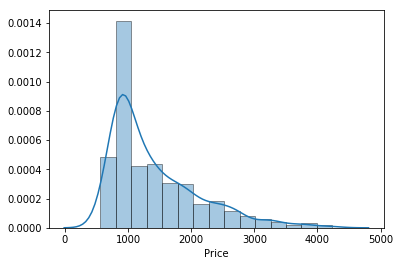

In [32]:
Price_comparison = sns.distplot(df.Price, bins = 15)

Story point 1:

The above graphs demonstrates the prices of the three cities namely Delhi, Noida and Gurgaon. It is important to note that Noida and Gurgaon are the satellite cities of Delhi. Therefore, there are geographically lined together in the region.
The graph indicates the price ranging from less than Rs 1,000 to less than Rs 5,000.
The number of rooms are at the peak when the price is low around less than Rs 1,000 to Rs 1,500 and as we move further the number of rooms decreases as the price go up.

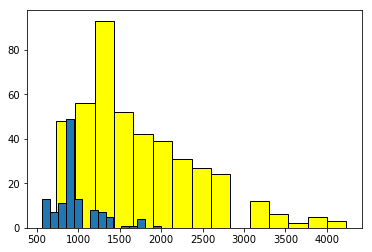

In [59]:
plt.hist(df_delhi.Price_Delhi, bins = 15, color = 'Yellow')
plt.hist(df_noida.Price_Noida, bins = 15)
plt.show()

Story point 2:

From the above graphs, we are comparing the price levels of two cities namely Delhi and Noida. The yellow bar is the price data of Delhi whereas the other one is of Noida. 
We can conclude from the dataset that the low cost rooms are available more in Noida. This is also due to the fact that Noida is a developing city with few people living compared to Delhi. Secondly, the housing cost in Noida is less than Delhi. Therefore, the impact is quite apparent in the cost of rooms as well.

In [60]:
df.sort_values(by = 'Rating', ascending = False)

,Rooms,Location,Price,Rating
0,OYO 9150 Hotel Tourist Palace,"Mahipalpur, Delhi",730,New
348,OYO 2744 YWCA International Guest House,"Near Jantar Mantar, Connaught Place, Delhi",2024,New
366,OYO 12532 Hotel Broadway Inn,"Nehru Enclave, Opposite Modi Tower, Nehru Plac...",2245,New
365,OYO 8730 Hotel Metro Heights,"West Extension Area, Karol Bagh, Delhi",2174,New
364,OYO 1768 Home Stay The Divine Home,"Near Lotus Temple, East of Kailash, Delhi",2174,New
361,OYO 329 Hotel C-Park Inn,"Nai Walan, Karol Bagh, Delhi",2062,New
360,OYO 11201 Near Bhikaji Cama Place,"Opp. Bhikaji Cama Palace, Delhi",2036,New
349,OYO 1634 Hotel Uppal International,"Pahar Ganj, Delhi",2024,New
341,OYO 11611 Royal Palace Inn,"Rohtak Rd, A1 Block Paschim Vihar, Block A, Delhi",1901,New
300,OYO 7135 Hotel Blue Sapphire,"Near Karol Bagh Police Station, Karol Bagh, Delhi",1431,New


We will manually input the ratings one by one for each city. This will be used to compare the rating of the three cities in the country. 

In [37]:
def ms_Delhi(a):
    Grade_delhi = len(df_delhi[df_delhi['Rating_Delhi'] == a])
    return Grade_delhi

New_x = ms_Delhi('New')
Excellent_x = ms_Delhi('4.5') + ms_Delhi('4.6') + ms_Delhi('4.7') + ms_Delhi('4.8') + ms_Delhi('4.9')
VeryGood_x = ms_Delhi('4.0') + ms_Delhi('4.1') + ms_Delhi('4.2') + ms_Delhi('4.3') + ms_Delhi('4.4')
Good_x = ms_Delhi('3.5') + ms_Delhi('3.6') + ms_Delhi('3.7') + ms_Delhi('3.8') + ms_Delhi('3.9')
Fair_x = ms_Delhi('3.0') + ms_Delhi('3.1') + ms_Delhi('3.2') + ms_Delhi('3.3') + ms_Delhi('3.4')

Grade_Delhi = {}
Grade_Delhi['New']=New_x
Grade_Delhi['Excellent']=Excellent_x 
Grade_Delhi['VeryGood']=VeryGood_x
Grade_Delhi['Good']=Good_x
Grade_Delhi['Fair']=Fair_x

print(Grade_Delhi)

{'New': 116, 'Excellent': 66, 'VeryGood': 165, 'Good': 82, 'Fair': 11}


In [41]:
def ms_Noida(b):
    grade_noida = len(df_noida[df_noida['Rating_Noida'] == b])
    return grade_noida

New_a = ms_Noida('New')
Excellent_a = ms_Noida('4.5') + ms_Noida('4.6') + ms_Noida('4.7') + ms_Noida('4.8') + ms_Noida('4.9')
VeryGood_a = ms_Noida('4.0') + ms_Noida('4.1') + ms_Noida('4.2') + ms_Noida('4.3') + ms_Noida('4.4')
Good_a = ms_Noida('3.5') + ms_Noida('3.6') + ms_Noida('3.7') + ms_Noida('3.8') + ms_Noida('3.9')
Fair_a = ms_Noida('3.0') + ms_Noida('3.1') + ms_Noida('3.2') + ms_Noida('3.3') + ms_Noida('3.4')

Grade_Noida = {}
Grade_Noida['New']=New_a
Grade_Noida['Excellent']=Excellent_a 
Grade_Noida['VeryGood']=VeryGood_a
Grade_Noida['Good']=Good_a
Grade_Noida['Fair']=Fair_a

print (Grade_Noida)

{'New': 17, 'Excellent': 26, 'VeryGood': 73, 'Good': 2, 'Fair': 2}


In [44]:
def ms_Gurgaon(c):
    grade_gurgaon = len(df_gurgaon[df_gurgaon['Rating_Gurgaon'] == c])
    return grade_gurgaon

New_q = ms_Gurgaon('New')
Excellent_q = ms_Gurgaon('4.5') + ms_Gurgaon('4.6') + ms_Gurgaon('4.7') + ms_Gurgaon('4.8') + ms_Gurgaon('4.9')
VeryGood_q = ms_Gurgaon('4.0') + ms_Gurgaon('4.1') + ms_Gurgaon('4.2') + ms_Gurgaon('4.3') + ms_Gurgaon('4.4')
Good_q = ms_Gurgaon('3.5') + ms_Gurgaon('3.6') + ms_Gurgaon('3.7') + ms_Gurgaon('3.8') + ms_Gurgaon('3.9')
Fair_q = ms_Gurgaon('3.0') + ms_Gurgaon('3.1') + ms_Gurgaon('3.2') + ms_Gurgaon('3.3') + ms_Gurgaon('3.4')

Grade_Gurgaon = {}
Grade_Gurgaon['New']=New_q
Grade_Gurgaon['Excellent']=Excellent_q 
Grade_Gurgaon['VeryGood']=VeryGood_q
Grade_Gurgaon['Good']=Good_q
Grade_Gurgaon['Fair']=Fair_q

print (Grade_Gurgaon)

{'New': 116, 'Excellent': 66, 'VeryGood': 165, 'Good': 82, 'Fair': 11}


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

your_df = pandas.DataFrame(data = {'Delhi-NCR':['Delhi', 'Noida', 'Gurgaon'],
            'New':[55, 29, 6],
            'Excellent':[48, 29, 2],
            'VeryGood':[137, 66, 26],
            'Good':[18, 4, 6],
            'Fair':[2, 0, 0]})
long_df = pandas.melt(your_df, id_vars = ['Delhi-NCR'], value_vars = ['New', 'Excellent', 'VeryGood', 'Good', 'Fair'])
print(long_df)

   Delhi-NCR   variable  value
0      Delhi        New     55
1      Noida        New     29
2    Gurgaon        New      6
3      Delhi  Excellent     48
4      Noida  Excellent     29
5    Gurgaon  Excellent      2
6      Delhi   VeryGood    137
7      Noida   VeryGood     66
8    Gurgaon   VeryGood     26
9      Delhi       Good     18
10     Noida       Good      4
11   Gurgaon       Good      6
12     Delhi       Fair      2
13     Noida       Fair      0
14   Gurgaon       Fair      0


AttributeError: module 'seaborn' has no attribute 'plt'

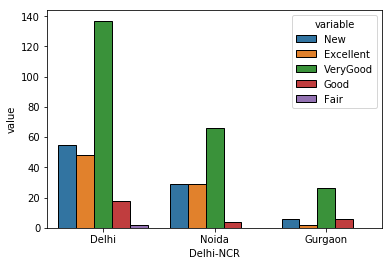

In [46]:
my_plot = sns.barplot(x = "Delhi-NCR", y = "value", hue = "variable", data = long_df)
sns.plt.show()

Story point 3:

We have made a graph to compare the ratings between the three cities. 
Our basket is as follows:
Excellent: 4.5-4.9; Very good: 4.0-4.4; Good: 3.5-3.9; Fair: 3.1-3.4;

Since, the dataset of Delhi is larger compared with other two cities it has more new rooms which have not yet been rated by the people. Noida has been closely following the trend majorly because it lands at the centre of Delhi and Agra. Agra is a tourist city as it houses Taj Mahal, one of the seven wonders of the world. 

However, Gurgaon being a capitalist city has less rooms and rating also suffers due to various social reasons. 